# 1 | Data

## The datasets were obtained from the 2010 and 2020 
## <a style = "text-decoration: none;" href = "https://www.census.gov/programs-surveys/acs/data.html"><b>United States Census Bureau American Community Surveys</b></a>

## 2010 Files:
<ul>
  <li><a style = "text-decoration: none;" href = "https://data.census.gov/table?g=1400000US48201312000,48201312100,48201312200,48201312300,48201312400,48201312700,48201312800&y=2010&tid=ACSST5Y2010.S1501">Educational Attainment</a></li>
  <li><a style = "text-decoration: none;" href = "https://data.census.gov/table?q=Housing&g=1400000US48201312000,48201312100,48201312200,48201312300,48201312400,48201312700,48201312800&y=2010&tid=ACSST5Y2010.S2506">Housing Costs</a></li>
  <li><a style = "text-decoration: none;" href = "https://data.census.gov/table?q=Income&g=1400000US48201312000,48201312100,48201312200,48201312300,48201312400,48201312700,48201312800&y=2010">Income and Poverty</a></li>
  <li><a style = "text-decoration: none;" href = "https://data.census.gov/table?t=Place+of+Birth&g=1400000US48201312000,48201312100,48201312200,48201312300,48201312400,48201312700,48201312800&y=2010&tid=ACSDT5Y2010.B05002">Place of Birth</a></li>
  <li><a style = "text-decoration: none;" href = "https://data.census.gov/table?t=Populations+and+People&g=1400000US48201312000,48201312100,48201312200,48201312300,48201312400,48201312700,48201312800&y=2010">Population by Race</a></li>
</ul>

## 2020 Files:
<ul>
  <li><a style = "text-decoration: none;" href = "https://data.census.gov/table?g=1400000US48201312000,48201312100,48201312200,48201312300,48201312400,48201312700,48201312800&y=2020">Educational Attainment</a></li>
  <li><a style = "text-decoration: none;" href = "https://data.census.gov/table?q=Housing&g=1400000US48201312000,48201312100,48201312200,48201312300,48201312400,48201312700,48201312800&y=2020&tid=ACSST5Y2020.S2506">Housing Costs</a></li>
  <li><a style = "text-decoration: none;" href = "https://data.census.gov/table?q=Income&t=Place+of+Birth&g=1400000US48201312000,48201312100,48201312200,48201312300,48201312400,48201312700,48201312800&y=2020">Income and Poverty</a></li>
  <li><a style = "text-decoration: none;" href = "https://data.census.gov/table?t=Place+of+Birth&g=1400000US48201312000,48201312100,48201312200,48201312300,48201312400,48201312700,48201312800&y=2020&tid=ACSDT5Y2020.B05002">Place of Birth</a></li>
  <li><a style = "text-decoration: none;" href = "https://data.census.gov/table?t=Populations+and+People&g=1400000US48201312000,48201312100,48201312200,48201312300,48201312400,48201312700,48201312800&y=2020">Population by Race</a></li>
</ul>

In [1]:
# Read CSV files 

# 2010 CSV files
education_2010 <- read.csv("2010 Educational Attainment.csv")
housing_2010 <- read.csv("2010 Housing Costs.csv")
income_2010 <- read.csv("2010 Income and Poverty.csv")
birth_2010 <- read.csv("2010 Place of Birth.csv")
population_2010 <- read.csv("2010 Population by Race.csv")

# 2020 CSV files
education_2020 <- read.csv("2020 Educational Attainment.csv")
housing_2020 <- read.csv("2020 Housing Costs.csv")
income_2020 <- read.csv("2020 Income and Poverty.csv")
birth_2020 <- read.csv("2020 Place of Birth.csv")
population_2020 <- read.csv("2020 Population by Race.csv")

For Census Tract 3121, there lacks data for:
<u1>
    <li>Educational Attainment, Housing Costs, and Income and Povery in 2010</li>
    <li>Educational Attainment, Housing Costs, Income and Poverty, Place of Birth, and Population by Race in 2010</li>

# 2 | Map of Third Ward (Relative to Downtown Houston)

In [2]:
# Load libraries
library(dplyr)
library(tibble)
library(usmap)
library(ggplot2)
library(ggtext)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# Coordinates of Third Ward and Downtown
third_ward <- data.frame(lon = -95.3499,
                         lat = 29.7278)

downtown <- data.frame(lon = -95.3573, 
                       lat = 29.7560)

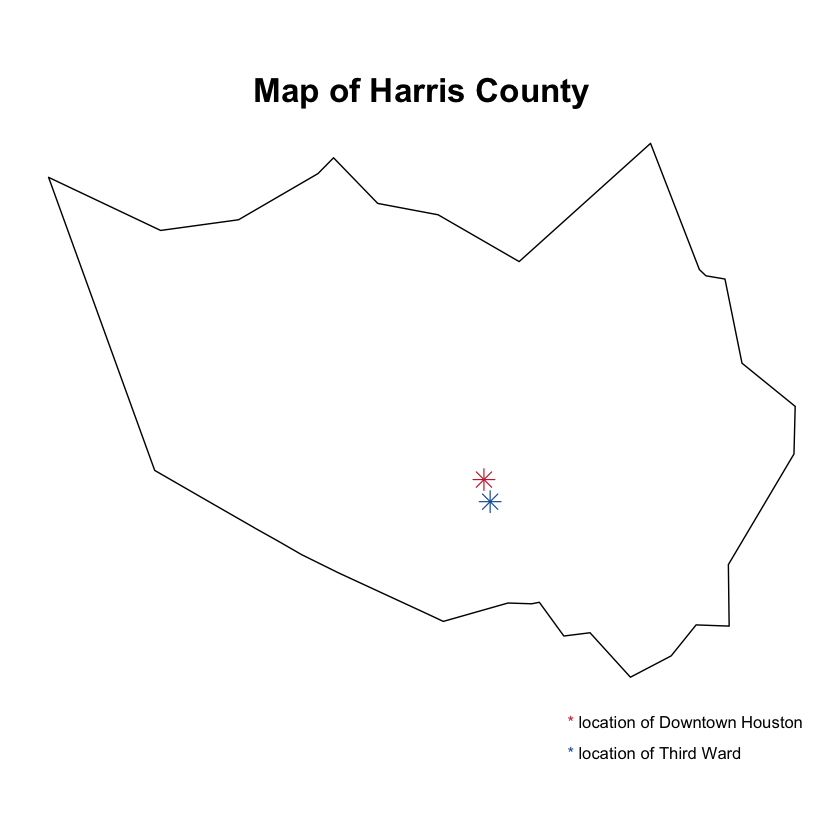

In [4]:
# Produce map
transformed_third_ward <- usmap_transform(third_ward)

transformed_downtown <- usmap_transform(downtown)

plot_usmap(regions = "counties",
           include = "48201") +
  geom_point(data = transformed_third_ward,
             aes(x = x, y = y),
             size = 4, pch = 8, color = "#145DA0") +
  geom_point(data = transformed_downtown,
             aes(x = x, y = y),
             size = 4, pch = 8, color = "#C92A39") +
  labs(title = "Map of Harris County",
       caption = "<span style = 'color: #C92A39;'>*</span> location of Downtown Houston
       \n<span style = 'color: #145DA0;'>*</span> location of Third Ward") +
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.50)) +
  theme(plot.caption = element_text(size = 10, hjust = 0.95)) +
  theme(plot.caption = element_markdown())

# 3 | Educational Attainment

In [5]:
# Subset the dataframes and rename the columns
education_2010_poverty <- education_2010[c(29:32),
                                         c(1, 2, 8, 14, 20, 26, 32, 38)]
colnames(education_2010_poverty) <- c("Educational Level", "Census Tract 3120",
                                      "Census Tract 3121", "Census Tract 3122",
                                      "Census Tract 3123", "Census Tract 3124",
                                      "Census Tract 3127", "Census Tract 3128")
education_2010_poverty$`Educational Level` <- c("Less Than High School Graduate",
                                                "High School Graduate",
                                                "Some College or Associate's Degree",
                                                "Bachelor's Degree or Higher")

education_2010_earnings <- education_2010[c(35:39),
                                          c(1, 2, 8, 14, 20, 26, 32, 38)]
colnames(education_2010_earnings) <- c("Educational Level", "Census Tract 3120",
                                       "Census Tract 3121", "Census Tract 3122",
                                       "Census Tract 3123", "Census Tract 3124",
                                       "Census Tract 3127", "Census Tract 3128")
education_2010_earnings$`Educational Level` <- c("Less Than High School Graduate",
                                                 "High School Graduate",
                                                 "Some College or Associate's Degree",
                                                 "Bachelor's Degree or Higher",
                                                 "Graduate or Professional Degree")

education_2020_poverty <- education_2020[c(58:61),
                                         c(1, 4, 16, 28, 40, 52, 64)]
colnames(education_2020_poverty) <- c("Educational Level", "Census Tract 3120",
                                      "Census Tract 3122", "Census Tract 3123", 
                                      "Census Tract 3124", "Census Tract 3127",
                                      "Census Tract 3128")
education_2020_poverty$`Educational Level` <- c("Less Than High School Graduate",
                                                "High School Graduate",
                                                "Some College or Associate's Degree",
                                                "Bachelor's Degree or Higher")

education_2020_earnings <- education_2020[c(64:68),
                                          c(1, 2, 14, 26, 38, 50, 62)]
colnames(education_2020_earnings) <- c("Educational Level", "Census Tract 3120",
                                       "Census Tract 3122", "Census Tract 3123", 
                                       "Census Tract 3124", "Census Tract 3127",
                                       "Census Tract 3128")
education_2020_earnings$`Educational Level` <- c("Less Than High School Graduate",
                                                 "High School Graduate",
                                                 "Some College or Associate's Degree",
                                                 "Bachelor's Degree",
                                                 "Graduate or Professional Degree")

In [6]:
# Change the percent symbol and thousand separator (comma) to decimal 
# Choose which columns to change 
column_change_e2010 <- c("Census Tract 3120", "Census Tract 3121",
                         "Census Tract 3122", "Census Tract 3123", 
                         "Census Tract 3124", "Census Tract 3127",
                         "Census Tract 3128")

column_change_e2020 <- c("Census Tract 3120", "Census Tract 3122", 
                         "Census Tract 3123", "Census Tract 3124", 
                         "Census Tract 3127", "Census Tract 3128")

education_2010_poverty[ , column_change_e2010] <- lapply(education_2010_poverty[ , column_change_e2010],
                                                         function(x){as.numeric(gsub("[%,]","", x))})

education_2010_earnings[ , column_change_e2010] <- lapply(education_2010_earnings[ , column_change_e2010],
                                                          function(x){as.numeric(gsub("[%,]","", x))})

education_2020_poverty[ , column_change_e2020] <- lapply(education_2020_poverty[ , column_change_e2020],
                                                         function(x){as.numeric(gsub("%","", x))})

education_2020_earnings[ , column_change_e2020] <- lapply(education_2020_earnings[ , column_change_e2020],
                                                          function(x){as.numeric(gsub(",","", x))})

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”


In [7]:
# Replace the NA values with a 0
education_2010_poverty[is.na(education_2010_poverty)] <- 0
education_2010_earnings[is.na(education_2010_earnings)] <- 0

education_2020_earnings[is.na(education_2020_earnings)] <- 0

In [8]:
# Subset the rows
education_2010_poverty <- education_2010_poverty[c(1:4), -c(3)]

In [9]:
# Reshape the data from wide to long
library(tidyr)

education_2010_poverty <- education_2010_poverty %>%
  pivot_longer(cols = c(`Census Tract 3120`, `Census Tract 3122`,
                        `Census Tract 3123`, `Census Tract 3124`,
                        `Census Tract 3127`, `Census Tract 3128`),
               names_to = "Census Tract",
               values_to = "Percent")

education_2020_poverty <- education_2020_poverty %>%
  pivot_longer(cols = c(`Census Tract 3120`, `Census Tract 3122`,
                        `Census Tract 3123`, `Census Tract 3124`,
                        `Census Tract 3127`, `Census Tract 3128`),
               names_to = "Census Tract",
               values_to = "Percent")

education_2010_earnings <- education_2010_earnings %>%
  pivot_longer(cols = c(`Census Tract 3120`, `Census Tract 3121`, 
                        `Census Tract 3122`, `Census Tract 3123`, 
                        `Census Tract 3124`, `Census Tract 3127`, 
                        `Census Tract 3128`),
               names_to = "Census Tract",
               values_to = "Amount")

education_2020_earnings <- education_2020_earnings %>%
  pivot_longer(cols = c(`Census Tract 3120`, `Census Tract 3122`,
                        `Census Tract 3123`, `Census Tract 3124`,
                        `Census Tract 3127`, `Census Tract 3128`),
               names_to = "Census Tract",
               values_to = "Amount")

In [10]:
# Create a new variable for the year
education_2010_poverty$Year <- 2010
education_2010_earnings$Year <- 2010

education_2020_poverty$Year <- 2020
education_2020_earnings$Year <- 2020

In [11]:
# Combine the four subsets into two
education_poverty <- rbind(education_2010_poverty, education_2020_poverty)

education_earnings <- rbind(education_2010_earnings, education_2020_earnings)

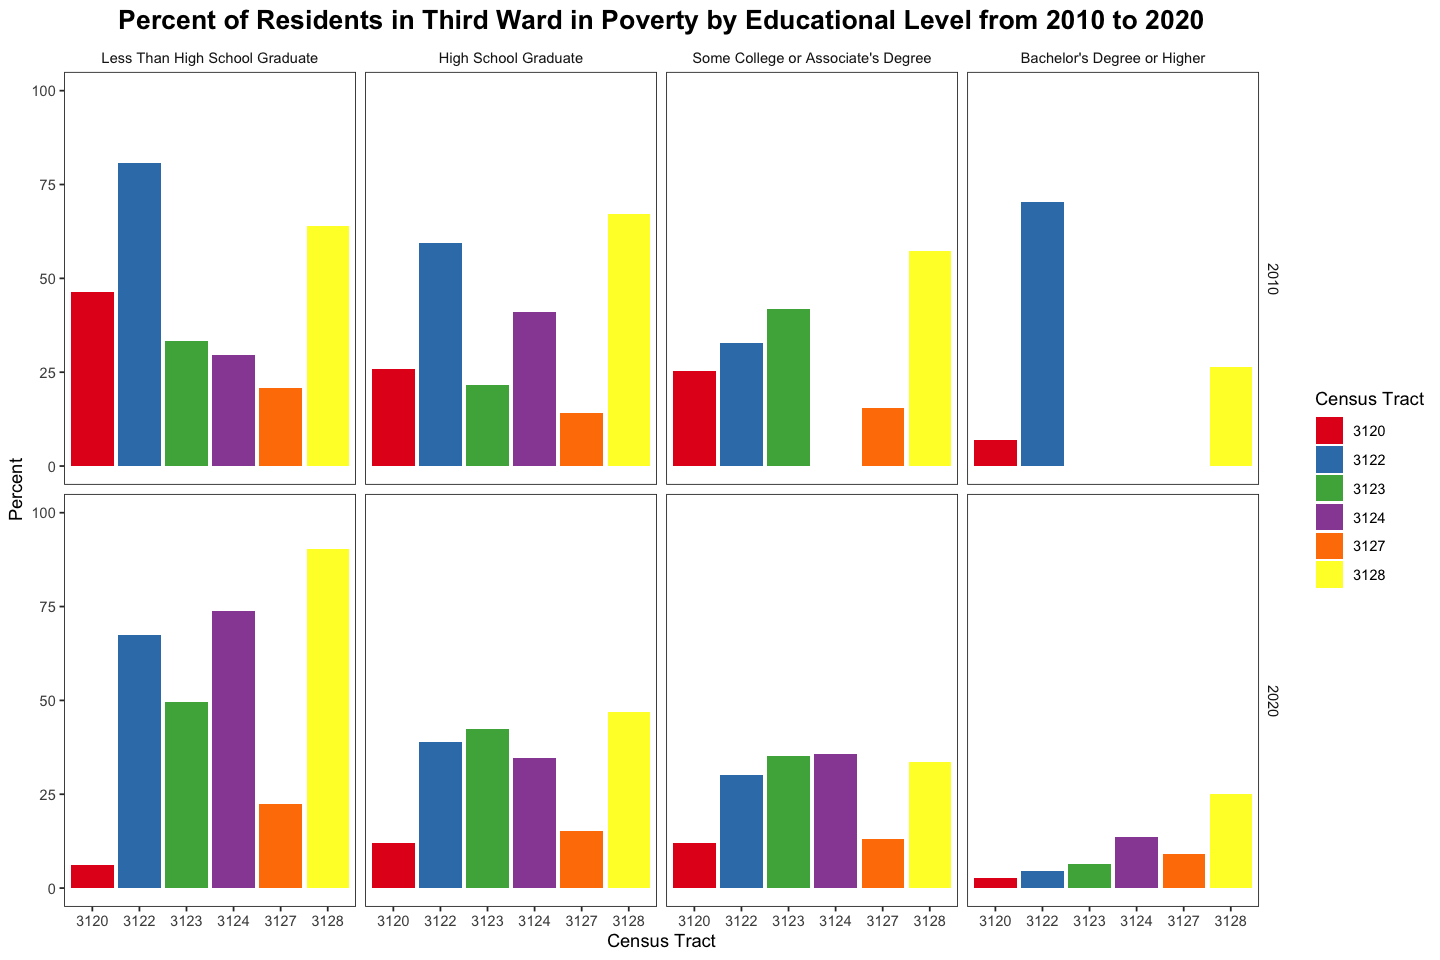

In [12]:
# Plot the graph
library(ggplot2)
library(RColorBrewer)

education_poverty$`Educational Level`[education_poverty$`Educational Level` == "Less Than High School Graduate"] <- 1
education_poverty$`Educational Level`[education_poverty$`Educational Level` == "High School Graduate"] <- 2
education_poverty$`Educational Level`[education_poverty$`Educational Level` == "Some College or Associate's Degree"] <- 3
education_poverty$`Educational Level`[education_poverty$`Educational Level` == "Bachelor's Degree or Higher"] <- 4

year_labs <- c("2010", "2020")
names(year_labs) <- c("2010", "2020")

educational_level_labs <- c("Less Than High School Graduate", "High School Graduate",
                            "Some College or Associate's Degree", "Bachelor's Degree or Higher")
names(educational_level_labs) <- c(1, 2, 3, 4)

options(repr.plot.width = 12, repr.plot.height = 8)

ggplot(data = education_poverty,
       mapping = aes(x = `Census Tract`, y = Percent, fill = `Census Tract`)) +
  geom_bar(position = "dodge", stat = "identity") +
  scale_x_discrete(limits = NULL,
                   labels = c("3120", "3122", "3123", "3124", "3127", "3128")) +
  scale_y_continuous(limits = c(0, 100),
                     breaks = c(0, 25, 50, 75, 100)) +
  # scale_fill_discrete(labels = c("3120", "3122", "3123", "3124", "3127", "3128")) +
  scale_fill_brewer(palette = "Set1", labels = c("3120", "3122", "3123", "3124", "3127", "3128")) +
  facet_grid(Year ~ `Educational Level`,
             labeller = labeller(Year = year_labs, `Educational Level` = educational_level_labs)) +
  theme(legend.position = "none") +
  theme_bw() +
  theme(panel.grid.major = element_blank()) +
  theme(panel.grid.minor = element_blank()) +
  theme(strip.background = element_blank()) +
  labs(title = "Percent of Residents in Third Ward in Poverty by Educational Level from 2010 to 2020") +
  theme(plot.title = element_text(face = "bold", size = 16, hjust = 0.50))

# 4 | Housing Costs

In [13]:
# Subset the dataframes and rename the columns and values in the first column
housing_2010_subset <- housing_2010[c(3:10, 26), c(1, 2, 6, 8, 10, 12, 14)]

housing_2020_subset <- housing_2020[c(3:10, 27), c(1, 4, 8, 12, 16, 20, 24)]

colnames(housing_2010_subset) <- c("House Value (USD)", "Census Tract 3120",
                                   "Census Tract 3122", "Census Tract 3123",
                                   "Census Tract 3124", "Census Tract 3127",
                                   "Census Tract 3128")

colnames(housing_2020_subset) <- c("House Value (USD)", "Census Tract 3120",
                                   "Census Tract 3122", "Census Tract 3123",
                                   "Census Tract 3124", "Census Tract 3127",
                                   "Census Tract 3128")

housing_2010_subset$`House Value (USD)` <- c("< $50,000", "$50,000 - $99,000", "$100,000 - $149,999",
                                             "$150,000 - $199,999", "$200,000 - $299,999", "$300,000 - $499,999",
                                             "> $500,000", "Median Household Value", "Median Income")

housing_2020_subset$`House Value (USD)` <- c("< $50,000", "$50,000 - $99,000", "$100,000 - $149,999",
                                             "$150,000 - $199,999", "$200,000 - $299,999", "$300,000 - $499,999",
                                             "> $500,000", "Median Household Value", "Median Income")

In [14]:
# Change the percent symbol and thousand separator (comma) to decimal 
# Choose which columns to change 
column_change_h2010 <- c("Census Tract 3120", "Census Tract 3122",
                         "Census Tract 3123", "Census Tract 3124", 
                         "Census Tract 3127", "Census Tract 3128")

housing_2010_subset[ , column_change_h2010] <- lapply(housing_2010_subset[ , column_change_h2010],
                                                      function(x){as.numeric(gsub("[%,-]","", x))})

column_change_h2020 <- c("Census Tract 3120", "Census Tract 3122",
                         "Census Tract 3123", "Census Tract 3124", 
                         "Census Tract 3127", "Census Tract 3128")

housing_2020_subset[ , column_change_h2020] <- lapply(housing_2020_subset[ , column_change_h2020],
                                                      function(x){as.numeric(gsub("[%,-]","", x))})

In [15]:
# Replace a value/NA values in the dataframe
housing_2010_subset$`Census Tract 3128`[housing_2010_subset$`Census Tract 3128` == "2500"] <- "25000"

housing_2020_subset[is.na(housing_2020_subset)] <- 0

In [16]:
# Subset median rows
housing_2010_median <- housing_2010_subset[8, ]

housing_2020_median <- housing_2020_subset[8, ]

In [17]:
# Transpose the data frame
housing_2010_median <- t(housing_2010_median)

housing_2020_median <- t(housing_2020_median)

# Convert from matrix to data frame
housing_2010_median <- as.data.frame(housing_2010_median)

housing_2020_median <- as.data.frame(housing_2020_median)

In [18]:
# Rename the rownames into the first column 
library(tibble)
housing_2010_median <- tibble::rownames_to_column(housing_2010_median, "Census Tract")

housing_2020_median <- tibble::rownames_to_column(housing_2020_median, "Census Tract")

# Rename a value in the first row
housing_2010_median$`Census Tract`[housing_2010_median$`Census Tract` == "House Value (USD)"] <- "Census Tract"

housing_2020_median$`Census Tract`[housing_2020_median$`Census Tract` == "House Value (USD)"] <- "Census Tract"

In [19]:
# Convert the first row to the column names
colnames(housing_2010_median) <- housing_2010_median[1, ]

colnames(housing_2020_median) <- housing_2020_median[1, ]

# Subset rows
housing_2010_median <- housing_2010_median[c(2:7), c(1:2)]

housing_2020_median <- housing_2020_median[c(2:7), c(1:2)]

# Convert second column to numeric
housing_2010_median$`Median Household Value` <- as.numeric(housing_2010_median$`Median Household Value`)

housing_2020_median$`Median Household Value` <- as.numeric(housing_2020_median$`Median Household Value`)

In [20]:
# Create a new variable for the year 
housing_2010_median$Year <- "2010"

housing_2020_median$Year <- "2020"

# Combine the two subsets
housing_median <- rbind(housing_2010_median, housing_2020_median)

# Rename the second column
colnames(housing_median)[2] <- "Median"

## 4.1 | Housing Costs Graphs

### 4.1.1 | Slope Graph

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


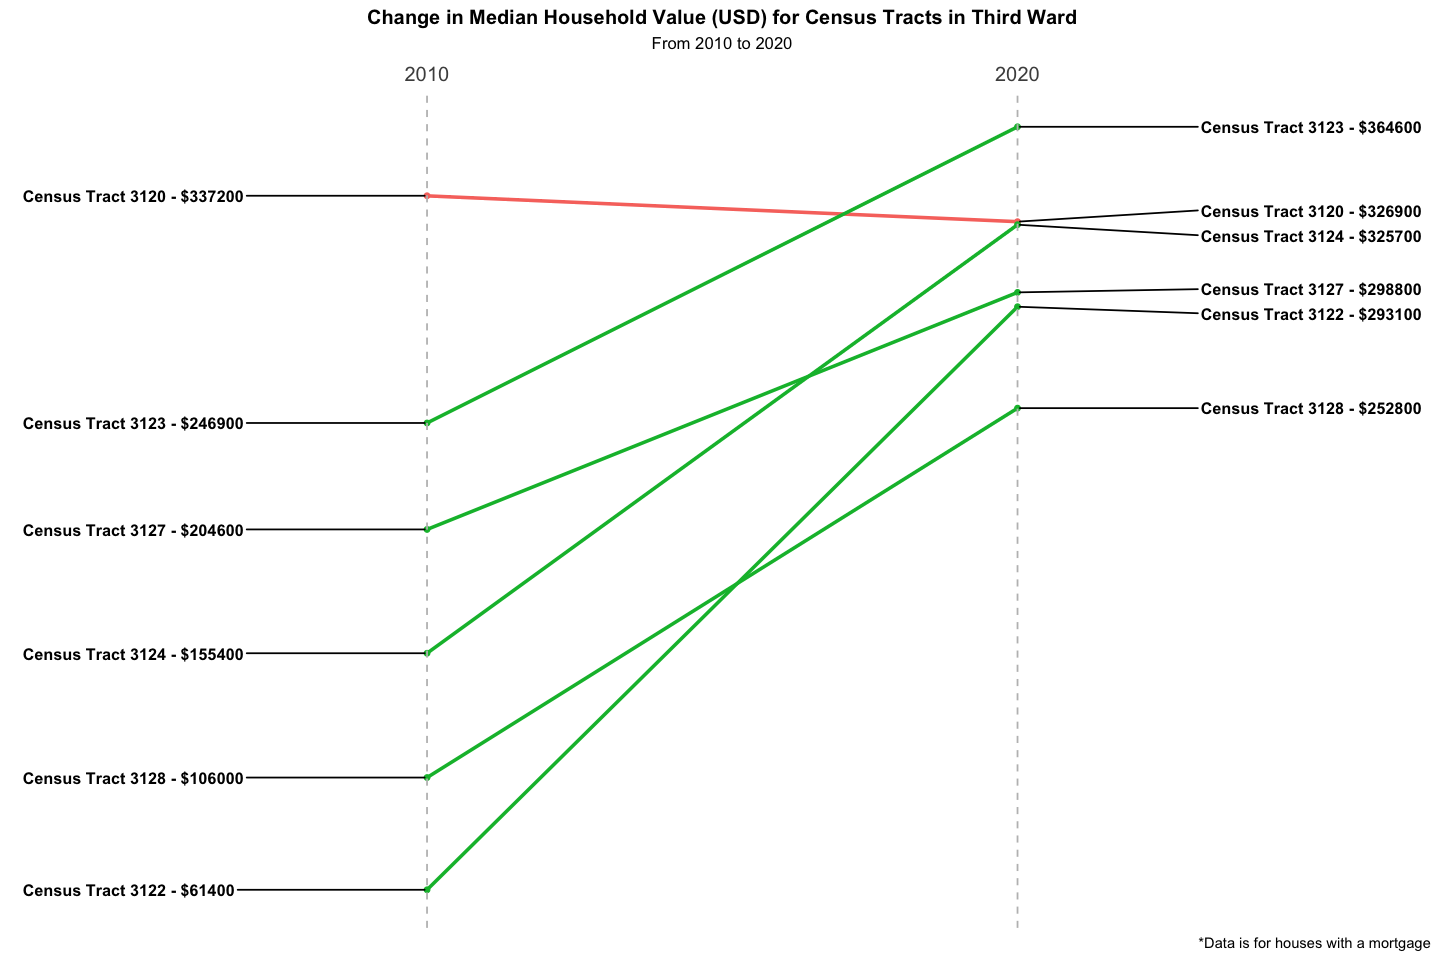

In [21]:
# Slope graph
library(ggplot2)
library(ggrepel)

# Slope Chart
ggplot(data = housing_median, mapping = aes(x = Year, y = Median, group = `Census Tract`)) +
  geom_line(aes(color = `Census Tract`), alpha = 1, size = 1) +
  geom_point(aes(color = `Census Tract`), alpha = 1, size = 1.25) +
  scale_color_manual(values = c("#f8766d", "#00ba38", "#00ba38",
                                         "#00ba38", "#00ba38", "#00ba38")) +
                                           geom_vline(data = housing_median, mapping = aes(xintercept = Year), 
                                                      linetype = "dashed", size = 0.5, color = "gray") +
  geom_text_repel(data = housing_median %>% filter(Year == "2010"),
                  aes(label = paste0(`Census Tract`, " - ", "$", Median)),
                  hjust = "left",
                  fontface = "bold",
                  size = 3.42,
                  nudge_x = -0.70) +
  geom_text_repel(data = housing_median %>% filter(Year == "2020"),
                  aes(label = paste0(`Census Tract`, " - ", "$", Median)),
                  hjust = "right",
                  fontface = "bold",
                  size = 3.42,
                  nudge_x = 0.70,
                  direction = "y") +
  scale_x_discrete(position = "top") +
  theme_bw() +
  theme(legend.position = "none") +
  theme(panel.border = element_blank()) +
  theme(axis.title.y = element_blank()) +
  theme(axis.text.y = element_blank()) +
  theme(panel.grid.major.y = element_blank()) +
  theme(panel.grid.minor.y = element_blank()) +
  theme(axis.title.x = element_blank()) +
  theme(panel.grid.major.x = element_blank()) +
  theme(axis.text.x.top = element_text(size = 12)) +
  theme(axis.ticks = element_blank()) +
  labs(title = "Change in Median Household Value (USD) for Census Tracts in Third Ward",
       subtitle = "From 2010 to 2020",
       caption = "*Data is for houses with a mortgage") +
  theme(plot.title = element_text(size = 12, face = "bold", hjust = 0.50)) +
  theme(plot.subtitle = element_text(size = 10, hjust = 0.50))

### 4.1.2 | Dumbbell Plot

In [22]:
# Dumbbell Plot
library(ggtext)

# Filter by year
twenty_ten <- housing_median %>%
  filter(Year == "2010")

twenty_twenty <- housing_median %>%
  filter(Year == "2020")

# Calculate statistics
stats <- housing_median %>%
  group_by(Year) %>%
  summarise(mean = mean(Median),
            SE = sd(Median)) %>%
  mutate(meanpos = mean + 1 * SE,
         meanneg = mean - 1 * SE) 

stats_2010 <- stats %>%
  filter(Year == "2010")
stats_2010 %>%
  mutate_all(as.numeric)

stats_2020 <- stats %>%
  filter(Year == "2020")  
stats_2020 %>%
  mutate_all(as.numeric)

housing_difference <- cbind(housing_2010_median, housing_2020_median)

colnames(housing_difference)[2] <- "Median 2010"
colnames(housing_difference)[5] <- "Median 2020"

housing_difference <- housing_difference[ , c(1, 2, 5)]
housing_difference <- housing_difference %>%
  mutate(Difference = housing_difference$`Median 2020` - housing_difference$`Median 2010`)

housing_2010_difference <- housing_difference[, c(1, 2, 4)]

housing_2010_difference <- housing_2010_difference %>%
  mutate(Year = "2010") %>%
  mutate(x_position = housing_2010_difference$`Median 2010` + (housing_2010_difference$Difference/2))

housing_2010_difference$x_position[housing_2010_difference$x_position == "332050"] <- as.numeric("365000")

# Change the first column from a character to a numeric
housing_median_new <- housing_median
housing_median_new$`Census Tract` <- c(1, 2, 3, 4, 5, 6)
twenty_ten$`Census Tract` <- c(1, 2, 3, 4, 5, 6)
twenty_twenty$`Census Tract` <- c(1, 2, 3, 4, 5, 6)
housing_2010_difference$`Census Tract` <- c(1, 2, 3, 4, 5, 6)

Year,mean,SE,meanpos,meanneg
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,185250,99774.1,285024.1,85475.9


Year,mean,SE,meanpos,meanneg
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020,310316.7,37935.6,348252.3,272381.1


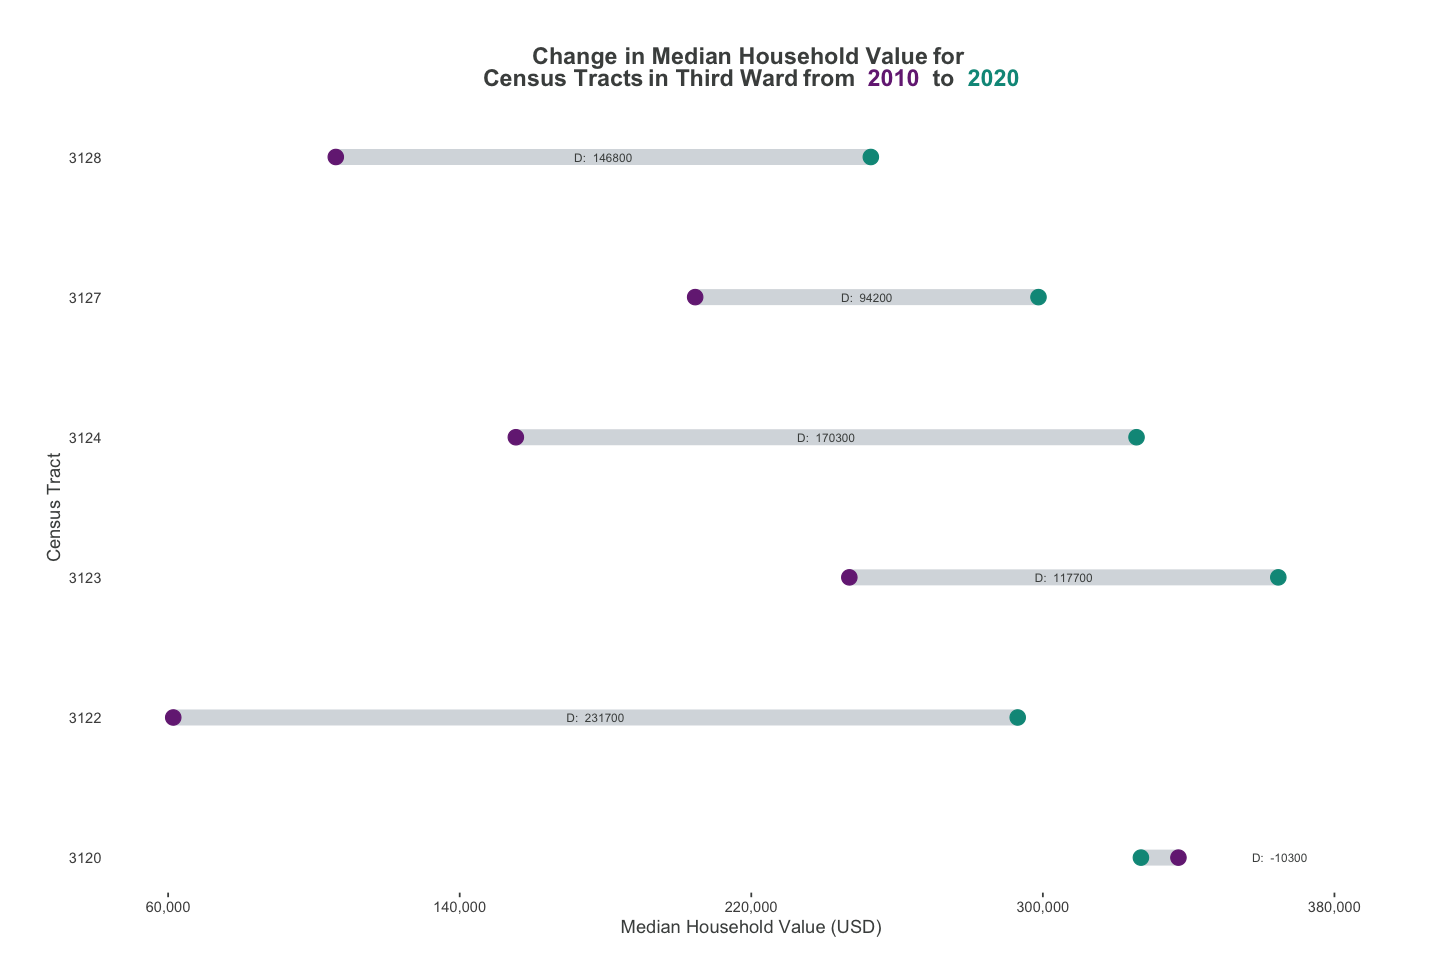

In [23]:
# Dumbbell Plot #1

ggplot(data = housing_median_new) +
  geom_segment(data = twenty_ten,
               mapping = aes(x = Median, xend = twenty_twenty$Median,
                             y = `Census Tract`, yend = twenty_twenty$`Census Tract`),
               color = "#aeb6bf",
               size = 4.5,
               alpha = 0.5) +
  geom_point(mapping = aes(x = Median, y = `Census Tract`, color = Year),
             size = 4, show.legend = FALSE) +
  scale_color_manual(values = c("#762a83", "#009688")) +
  geom_text(data = housing_2010_difference,
            mapping = aes(label = paste("D: ", Difference),
                          x = x_position, y = `Census Tract`),
            color = "#4a4e4d",
            size = 2.5) +
  # facet_grid(`Census Tract` ~ ., scales = "free", switch = "y") +
  scale_x_continuous(limits = c(60000, 380000),
                     breaks = c(60000, 140000, 220000, 300000, 380000),
                     labels = c("60,000", "140,000", "220,000", "300,000", "380,000")) +
  scale_y_continuous(limits = c(1, 6),
                     breaks = c(1, 2, 3, 4, 5, 6),
                     labels = c("3120", "3122", "3123", "3124", "3127", "3128")) +
  theme_minimal() +
  theme(panel.grid.major.y = element_blank()) +
  theme(panel.grid.minor.y = element_blank()) +
  theme(panel.grid.major.x = element_blank()) +
  theme(panel.grid.minor.x = element_blank()) +
  # theme(axis.title.y = element_blank()) +
  # theme(axis.text.y = element_blank()) +
  theme(axis.ticks.y = element_blank()) +
  theme(axis.ticks.x = element_line(color = "#4a4e4d")) +
  theme(text = element_text(color = "#4a4e4d")) +
  theme(strip.text.y.left = element_text(angle = 0)) +
  theme(panel.background = element_rect(fill = "white", color = "white")) +
  theme(strip.background = element_rect(fill = "white", color = "white")) +
  theme(strip.text = element_text(color = "#4a4e4d")) +
  theme(plot.background = element_rect(fill = "white", color = "white")) +
  theme(panel.spacing = unit(0, "lines")) +
  theme(plot.margin = margin(1, 1, 0.5, 1, "cm")) +
  labs(x = "Median Household Value (USD)", y = "Census Tract",
       title = "**Change in Median Household Value for <br>Census Tracts in Third Ward from** 
       <span style = 'color: #762a83;'>**2010**</span> 
       **to** 
       <span style = 'color: #009688;'>**2020**</span><br>") +
  theme(plot.title = element_markdown(size = 14, hjust = 0.50))

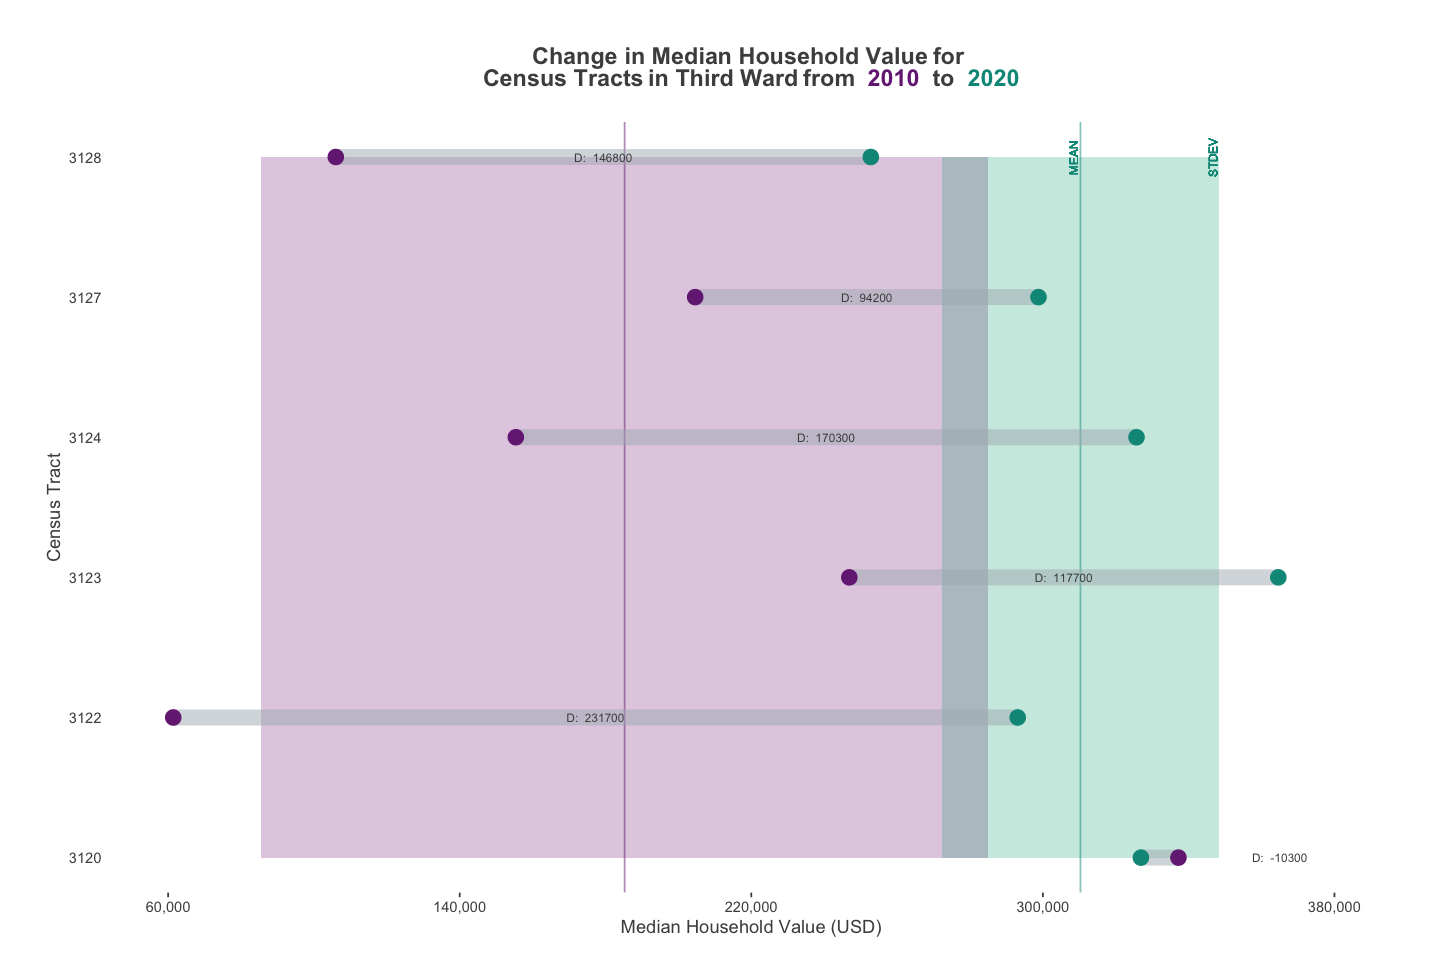

In [24]:
# Dumbbell Plot #2
ggplot(data = housing_median_new) +
  geom_rect(xmin = stats_2010$meanneg, xmax = stats_2010$meanpos,
            ymin = 1, ymax = 6,
            fill = "#762a83", alpha = 0.02) +
  geom_vline(xintercept = stats_2010$mean,
             linetype = "solid", size = 0.5, alpha = 0.5, color = "#762a83") +
  geom_rect(xmin = stats_2020$meanneg, xmax = stats_2020$meanpos,
            ymin = 1, ymax = 6,
            fill = "#009688", alpha = 0.02) +
  geom_vline(xintercept = stats_2020$mean, 
             linetype = "solid", size = 0.5, alpha = 0.5, color = "#009688") +
  geom_segment(data = twenty_ten,
               mapping = aes(x = Median, xend = twenty_twenty$Median,
                             y = `Census Tract`, yend = twenty_twenty$`Census Tract`),
               color = "#aeb6bf",
               size = 4.5,
               alpha = 0.5) +
  geom_point(mapping = aes(x = Median, y = `Census Tract`, color = Year),
             size = 4, show.legend = FALSE) +
  scale_color_manual(values = c("#762a83", "#009688")) +
  geom_text(data = housing_2010_difference,
            mapping = aes(label = paste("D: ", Difference),
                          x = x_position, y = `Census Tract`),
            # fill = "white",
            color = "#4a4e4d",
            size = 2.5) +
  geom_text(data = housing_median_new,
            x = stats_2020$mean - 1800, y = 6, 
            label = "MEAN", angle = 90, size = 2.5, color = "#009688") +
  geom_text(data = housing_median_new,
            x = stats_2020$meanpos - 1500, y = 6, 
            label = "STDEV", angle = 90, size = 2.5, color = "#009688") +
  # facet_grid(`Census Tract` ~ ., scales = "free", switch = "y") +
  scale_x_continuous(limits = c(60000, 380000),
                     breaks = c(60000, 140000, 220000, 300000, 380000),
                     labels = c("60,000", "140,000", "220,000", "300,000", "380,000")) +
  scale_y_continuous(limits = c(1, 6),
                     breaks = c(1, 2, 3, 4, 5, 6),
                     labels = c("3120", "3122", "3123", "3124", "3127", "3128")) +
  theme_minimal() +
  theme(panel.grid.major.y = element_blank()) +
  theme(panel.grid.minor.y = element_blank()) +
  theme(panel.grid.major.x = element_blank()) +
  theme(panel.grid.minor.x = element_blank()) +
  # theme(axis.text.y = element_blank()) +
  theme(axis.ticks.y = element_blank()) +
  theme(axis.ticks.x = element_line(color = "#4a4e4d")) +
  theme(text = element_text(color = "#4a4e4d")) +
  theme(strip.text.y.left = element_text(angle = 0)) +
  theme(panel.background = element_rect(fill = "white", color = "white")) +
  theme(strip.background = element_rect(fill = "white", color = "white")) +
  theme(strip.text = element_text(color = "#4a4e4d")) +
  theme(plot.background = element_rect(fill = "white", color = "white")) +
  theme(panel.spacing = unit(0, "lines")) +
  theme(plot.margin = margin(1, 1, 0.5, 1, "cm")) +
  labs(x = "Median Household Value (USD)", y = "Census Tract",
       title = "**Change in Median Household Value for <br>Census Tracts in Third Ward from** 
       <span style = 'color: #762a83;'>**2010**</span> 
       **to** 
       <span style = 'color: #009688;'>**2020**</span><br>") +
  theme(plot.title = element_markdown(size = 14, hjust = 0.50))

# 5 | Income and Poverty

In [25]:
# Subset the dataframes and rename the columns
income_2010_subset <- income_2010[c(12, 13), c(1, 2, 18, 26, 34, 42, 50)]

income_2020_subset <- income_2020[c(12, 13), c(1, 2, 10, 18, 26, 34, 42)]

colnames(income_2010_subset) <- c("Central Tendency", "Census Tract 3120",
                                  "Census Tract 3122", "Census Tract 3123",
                                  "Census Tract 3124", "Census Tract 3127",
                                  "Census Tract 3128")

colnames(income_2020_subset) <- c("Central Tendency", "Census Tract 3120",
                                  "Census Tract 3122", "Census Tract 3123",
                                  "Census Tract 3124", "Census Tract 3127",
                                  "Census Tract 3128")

In [26]:
# Transpose the dataframes
income_2010_subset <- t(income_2010_subset)

income_2020_subset <- t(income_2020_subset)

# Convert from matrix to data frame
income_2010_subset <- as.data.frame(income_2010_subset)

income_2020_subset <- as.data.frame(income_2020_subset)

In [27]:
# Rename the row names into the first column 
income_2010_subset <- tibble::rownames_to_column(income_2010_subset, "Census Tract")

income_2020_subset <- tibble::rownames_to_column(income_2020_subset, "Census Tract")

# Rename a value in the first row
income_2010_subset$`Census Tract`[income_2010_subset$`Census Tract` == "Central Tendency"] <- "Census Tract"

income_2020_subset$`Census Tract`[income_2020_subset$`Census Tract` == "Central Tendency"] <- "Census Tract"

# Convert the first row to the column names
colnames(income_2010_subset) <- income_2010_subset[1, ]

colnames(income_2020_subset) <- income_2020_subset[1, ]

In [28]:
# Subset rows
income_2010_subset <- income_2010_subset[c(2:7), c(1:3)]

income_2020_subset <- income_2020_subset[c(2:7), c(1:3)]

# Create a new variable for the year
income_2010_subset$Year <- "2010"

income_2020_subset$Year <- "2020"

# Combine the two subsets
income_tendencies <- rbind(income_2010_subset, income_2020_subset)

# Rename the second and third columns
colnames(income_tendencies)[2] <- "Median"
colnames(income_tendencies)[3] <- "Mean"

In [29]:
# Rename the second and third columns
colnames(income_tendencies)[2] <- "Median"
colnames(income_tendencies)[3] <- "Mean"

# Change thousand separators from comma to decimal
# Choose which columns to change 
column_change_i2010 <- c("Median", "Mean")

income_tendencies[ , column_change_i2010] <- lapply(income_tendencies[ , column_change_i2010],
                                                    function(x){as.numeric(gsub(",","", x))})

# Subset the columns
income_median <- income_tendencies[ , -c(3)]

income_mean <- income_tendencies[ , -c(2)]

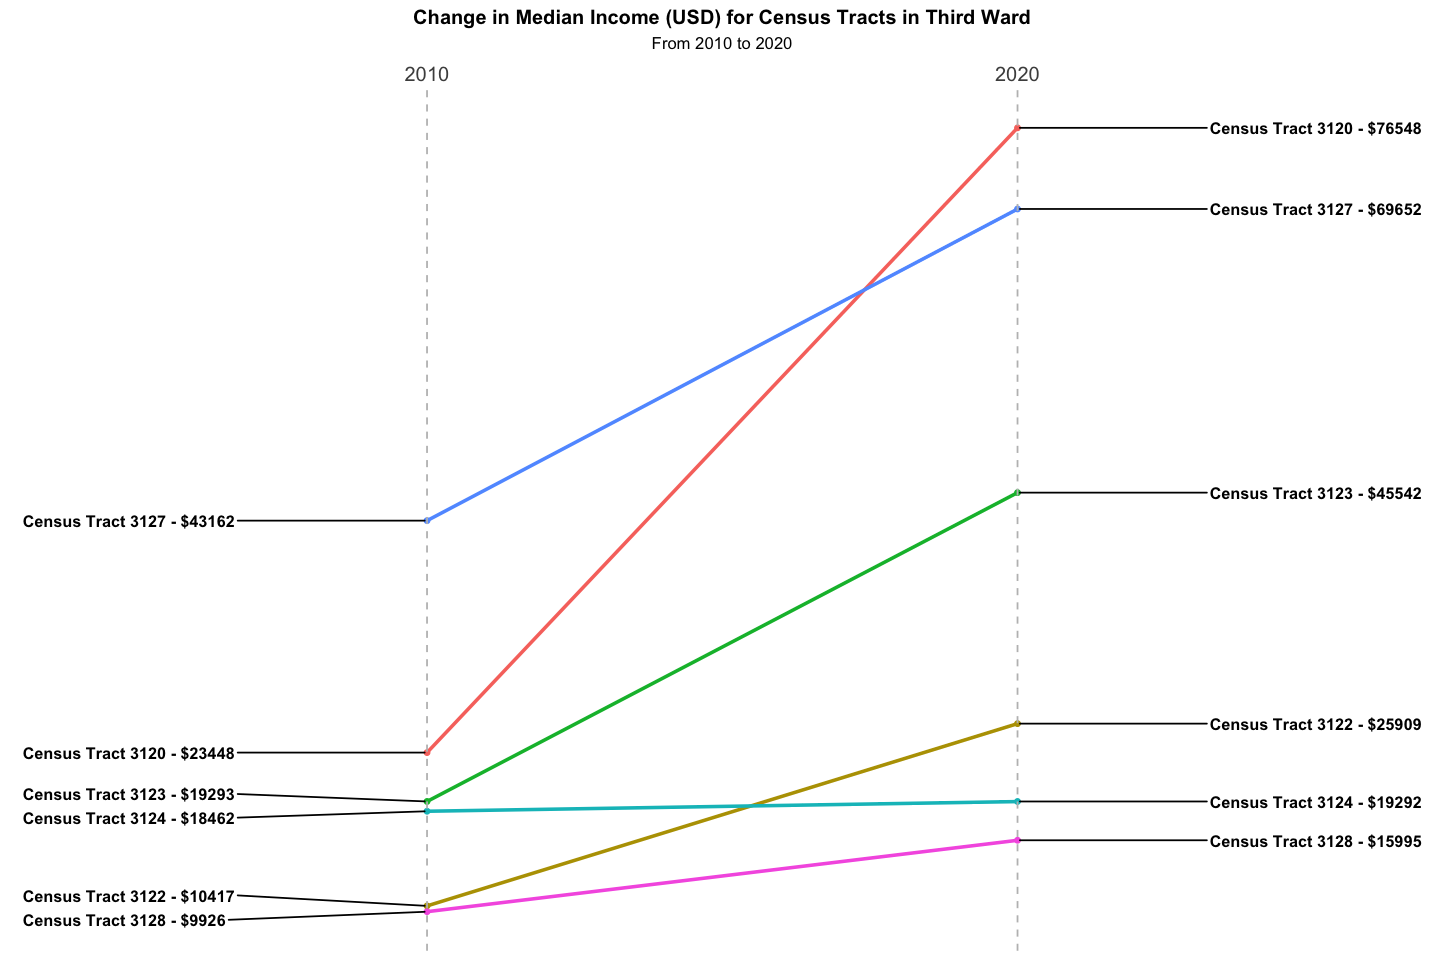

In [30]:
# Plot the graphs
library(ggplot2)
library(ggrepel)

ggplot(data = income_median, mapping = aes(x = Year, y = Median, group = `Census Tract`)) +
  geom_line(aes(color = `Census Tract`), alpha = 1, size = 1) +
  geom_point(aes(color = `Census Tract`), alpha = 1, size = 1.25) +
  geom_vline(data = income_median, mapping = aes(xintercept = Year), 
             linetype = "dashed", size = 0.5, color = "gray") +
  geom_text_repel(data = income_median %>% filter(Year == "2010"),
                  aes(label = paste0(`Census Tract`, " - ", "$", Median)),
                  hjust = "left",
                  fontface = "bold",
                  size = 3.42,
                  nudge_x = -0.70) +
  geom_text_repel(data = income_median %>% filter(Year == "2020"),
                  aes(label = paste0(`Census Tract`, " - ", "$", Median)),
                  hjust = "right",
                  fontface = "bold",
                  size = 3.42,
                  nudge_x = 0.70,
                  direction = "y") +
  scale_x_discrete(position = "top") +
  theme_bw() +
  theme(legend.position = "none") +
  theme(panel.border = element_blank()) +
  theme(axis.title.y = element_blank()) +
  theme(axis.text.y = element_blank()) +
  theme(panel.grid.major.y = element_blank()) +
  theme(panel.grid.minor.y = element_blank()) +
  theme(axis.title.x = element_blank()) +
  theme(panel.grid.major.x = element_blank()) +
  theme(axis.text.x.top = element_text(size = 12)) +
  theme(axis.ticks = element_blank()) +
  labs(title = "Change in Median Income (USD) for Census Tracts in Third Ward",
       subtitle = "From 2010 to 2020") +
  theme(plot.title = element_text(size = 12, face = "bold", hjust = 0.50)) +
  theme(plot.subtitle = element_text(size = 10, hjust = 0.50))

# 6 | Place of Birth

In [31]:
# Subset the dataframes
birth_2010_subset <- birth_2010[c(2:15), c(1, 2, 4, 6, 8, 10, 12, 14)]

birth_2020_subset <- birth_2020[c(2:27), c(1, 2, 4, 6, 8, 10, 12)]

# Rename the columns
colnames(birth_2010_subset) <- c("Birthplace", "Census Tract 3120", 
                                 "Census Tract 3121", "Census Tract 3122", 
                                 "Census Tract 3123", "Census Tract 3124", 
                                 "Census Tract 3127", "Census Tract 3128")

colnames(birth_2020_subset) <- c("Birthplace", "Census Tract 3120", 
                                 "Census Tract 3122", "Census Tract 3123", 
                                 "Census Tract 3124", "Census Tract 3127",
                                 "Census Tract 3128")

In [32]:
# Change thousand separators from comma to point
# Choose which columns to change 
column_change_b2010 <- c("Census Tract 3120", "Census Tract 3121", "Census Tract 3122",
                         "Census Tract 3123", "Census Tract 3124", "Census Tract 3127",
                         "Census Tract 3128")

birth_2010_subset[ , column_change_b2010] <- lapply(birth_2010_subset[ , column_change_b2010],
                                                    function(x){as.numeric(gsub(",", "", x))})

column_change_b2020 <- c("Census Tract 3120", "Census Tract 3122", "Census Tract 3123",
                         "Census Tract 3124", "Census Tract 3127", "Census Tract 3128")

birth_2020_subset[ , column_change_b2020] <- lapply(birth_2020_subset[ , column_change_b2020],
                                                    function(x){as.numeric(gsub(",", "", x))})

In [33]:
# Use a pipe to:
# Calculate the total of all the rows
# Create a new variable for the year 
birth_2010_subset <- birth_2010_subset %>%
  rowwise() %>%
  mutate(Total = sum(c_across(2:8))) %>%
  mutate(Year = 2010)

birth_2020_subset <- birth_2020_subset %>%
  rowwise() %>%
  mutate(Total = sum(c_across(2:7))) %>%
  mutate(Year = 2020)

In [34]:
# Subset the subset
birth_2010_subset <- birth_2010_subset[ , c(1, 9, 10)]

birth_2020_subset <- birth_2020_subset[ , c(1, 8, 9)]

# Rename the second column 
colnames(birth_2010_subset)[2] <- "Number of People"

colnames(birth_2020_subset)[2] <- "Number of People"

# Create subsets from the subsets and renaming the values in the first column
birth_2010_subset_birthplace <- birth_2010_subset[c(1, 12), ]
birth_2010_subset_birthplace$Birthplace <- c("Native-Born", "Foreign-Born")

birth_2020_subset_birthplace <- birth_2020[c(1, 12), ]
birth_2020_subset_birthplace$Birthplace <- c("Native-Born", "Foreign-Born")

birth_2010_subset <- birth_2010_subset[c(2, 4, 5, 6, 7, 9, 10, 11, 12), ]
birth_2010_subset$Birthplace <- c("Texas", "Northeast (U.S.)", "Midwest (U.S.)", "South (U.S.)", "West (U.S.)",
                                  "Puerto Rico", "U.S. Island Areas",
                                  "Born abroad of American parent(s)", "Foreign-Born")

birth_2020_subset <- birth_2020_subset[c(2, 4, 5, 6, 7, 9, 10, 11, 12), ]
birth_2020_subset$Birthplace <- c("Texas", "Northeast (U.S.)", "Midwest (U.S.)", "South (U.S.)", "West (U.S.)",
                                  "Puerto Rico", "U.S. Island Areas",
                                  "Born abroad of American parent(s)", "Foreign-Born")

# Combine the two subsets 
birth_combined <- rbind(birth_2010_subset, birth_2020_subset)

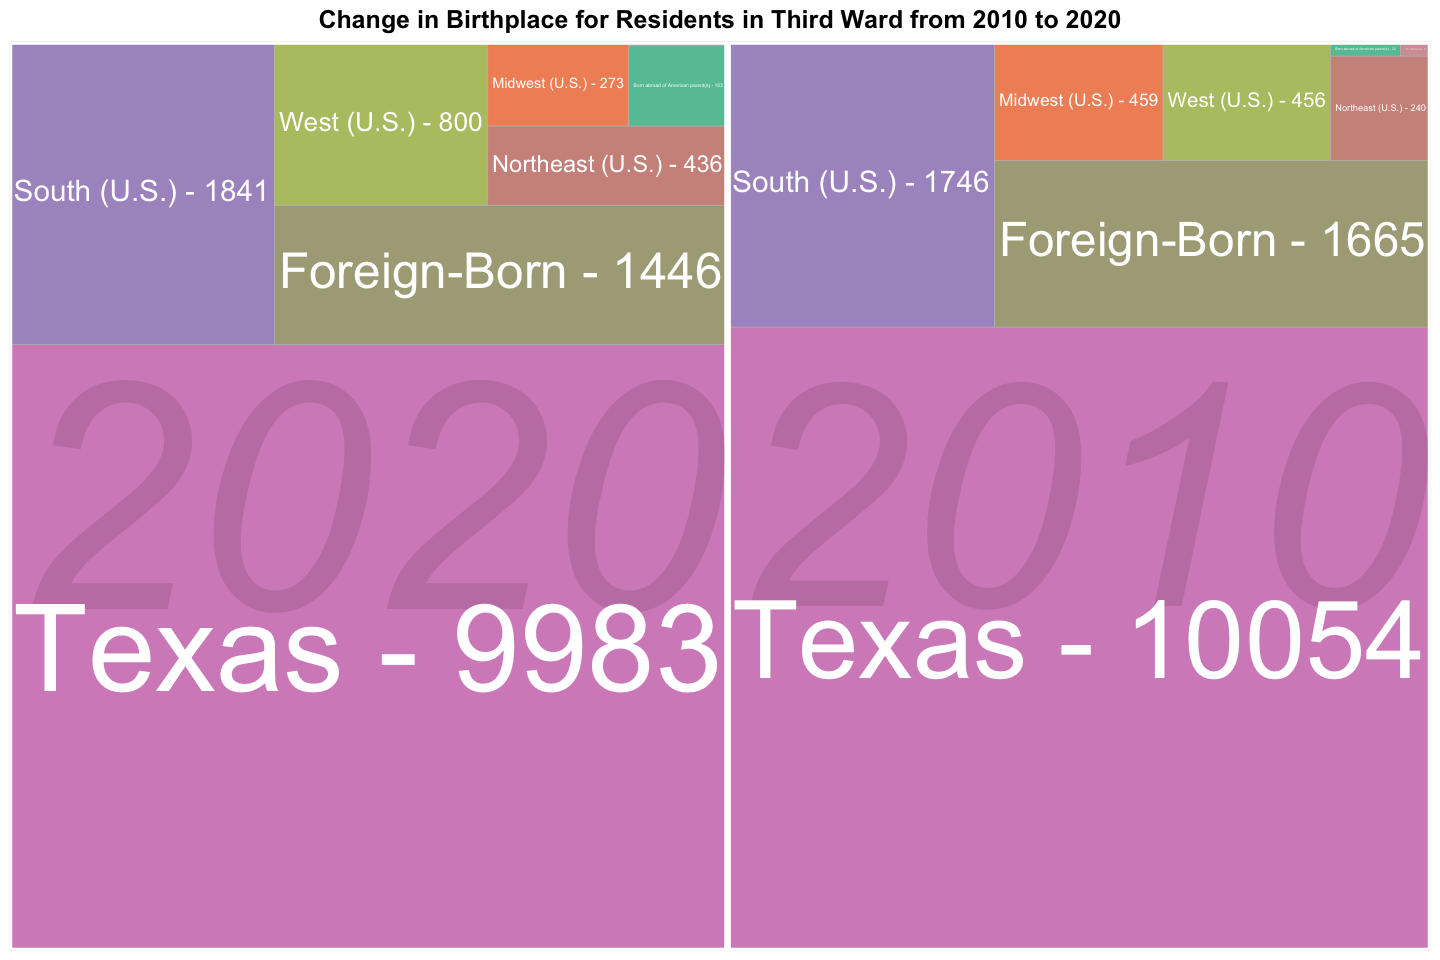

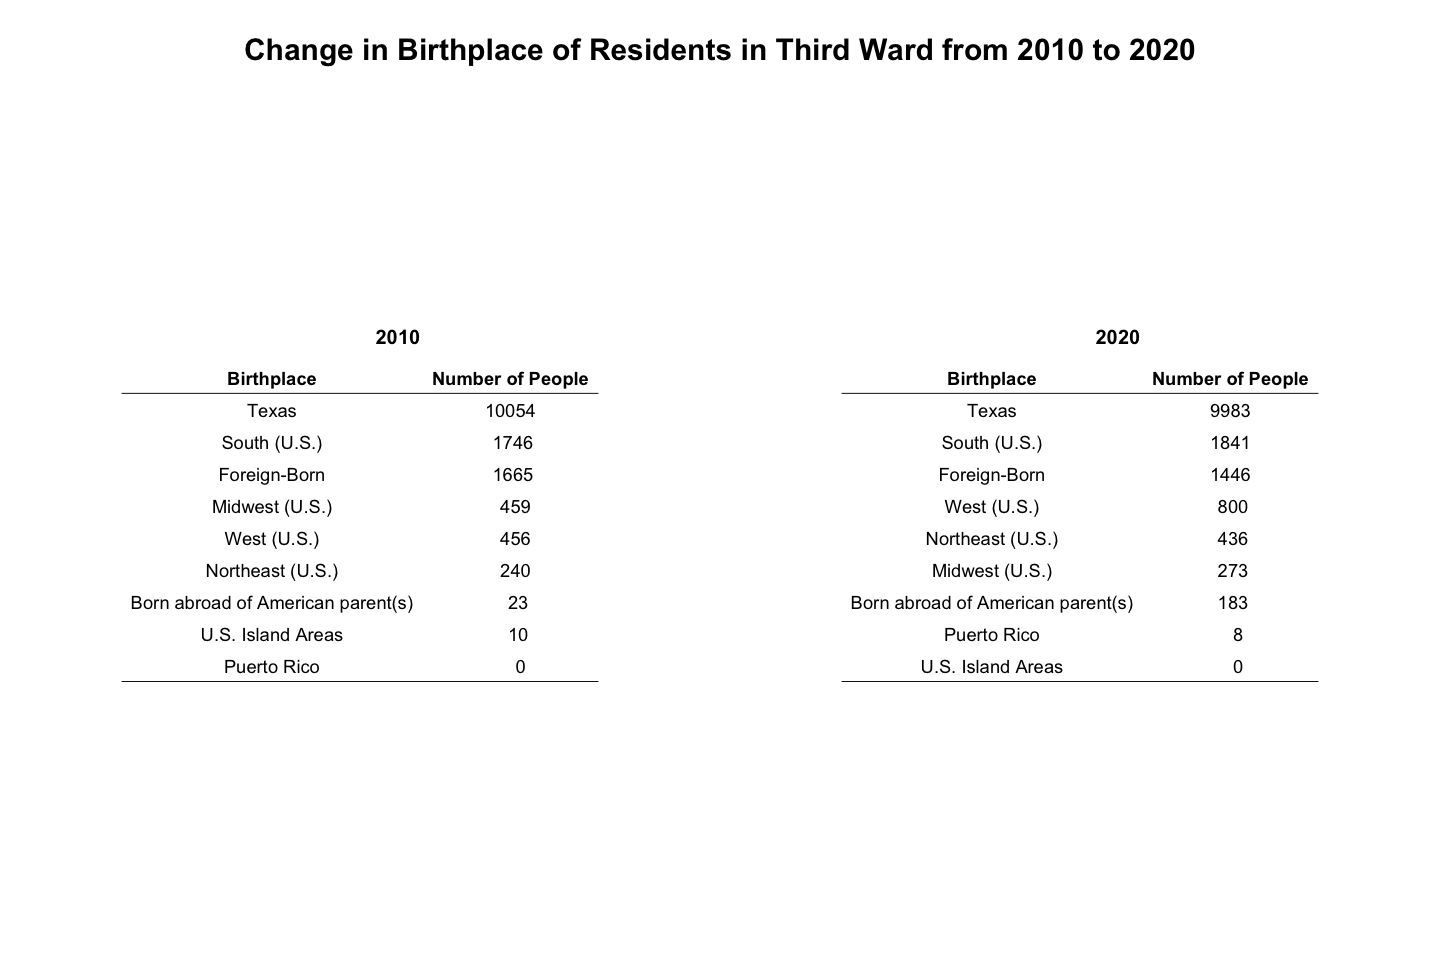

In [35]:
# Plot the graph
library(treemapify)
library(ggplot2)
library(RColorBrewer)

colors <- colorRampPalette(brewer.pal(8, "Set2"))(16)

options(repr.plot.width = 12, repr.plot.height = 8)
ggplot(data = birth_combined, 
       mapping = aes(area = `Number of People`, fill = factor(Birthplace),
                     label = Birthplace, subgroup = Year)) +
  geom_treemap() +
  geom_treemap_subgroup_border(colour = "white", size = 5) +
  geom_treemap_subgroup_text(place = "centre", grow = TRUE, 
                             alpha = 0.10, colour = "black",
                             fontface = "italic") +
  geom_treemap_text(mapping = aes(label = paste(`Birthplace`, "-", `Number of People`)),
                    colour = "white",
                    place = "centre",
                    min.size = 0.3,
                    grow = TRUE) +
  scale_fill_manual(values = colors) +
  theme(legend.position = "none") +
  labs(title = "Change in Birthplace for Residents in Third Ward from 2010 to 2020") +
  theme(plot.title = element_text(face = "bold", size = 15, hjust = 0.50))

library(ggpubr)
birth <- data.frame(birth_combined)
colnames(birth)[2] <- "Number_Of_People"

birth_2010 <- birth %>% 
  filter(Year == "2010") %>%
  arrange(desc(Number_Of_People)) %>%
  select(Birthplace, Number_Of_People)
colnames(birth_2010)[2] <- "Number of People"

birth_2020 <- birth %>% 
  filter(Year == "2020") %>%
  arrange(desc(Number_Of_People)) %>%
  select(Birthplace, Number_Of_People)
colnames(birth_2020)[2] <- "Number of People"

birthplace_2010 <- ggtexttable(birth_2010, rows = NULL, theme = ttheme("light")) %>%
  tab_add_title(text = "2010", face = "bold", hjust = -5.50)

birthplace_2020 <- ggtexttable(birth_2020, rows = NULL, theme = ttheme("light")) %>%
  tab_add_title(text = "2020", face = "bold", hjust = -5.50)

figure <- ggarrange(birthplace_2010, birthplace_2020,
                    ncol = 2, nrow = 1)

annotate_figure(figure,
                top = text_grob(label = "Change in Birthplace of Residents in Third Ward from 2010 to 2020",
                                vjust = 2.0, color = "black", face = "bold", size = 18))

# 7 | Population

In [36]:
# Rename the columns 
colnames(population_2010) <- c("Race", "Census Tract 3120", "Census Tract 3121",
                               "Census Tract 3122", "Census Tract 3123", "Census Tract 3124",
                               "Census Tract 3127", "Census Tract 3128")

colnames(population_2020) <- c("Race", "Census Tract 3120", "Census Tract 3122",
                               "Census Tract 3123", "Census Tract 3124", "Census Tract 3127",
                               "Census Tract 3128")

# Subet the dataframes
population_2010_subset <- population_2010[c(1, 3:9),]
population_2010_subset$Race <- c("Total", "White", 
                                 "Black or African American",
                                 "American Indian and Alaska Native",
                                 "Asian",
                                 "Native Hawaiian and Other Pacific Islander",
                                 "Other", "Two or More Races")

population_2020_subset <- population_2020[c(1, 3:9),]
population_2020_subset$Race <- c("Total", "White", 
                                 "Black or African American",
                                 "American Indian and Alaska Native",
                                 "Asian",
                                 "Native Hawaiian and Other Pacific Islander",
                                 "Other", "Two or More Races")

# Rearrange the rows
library(dplyr)
population_2010_subset <- population_2010_subset %>%
  slice(2:9, 1)

population_2020_subset <- population_2020_subset %>%
  slice(2:9, 1)

In [37]:
# Change thousand separators from comma to decimal
# Choose which columns to change 
column_change_p2010 <- c("Census Tract 3120", "Census Tract 3121", "Census Tract 3122",
                         "Census Tract 3123", "Census Tract 3124", "Census Tract 3127",
                         "Census Tract 3128")

population_2010_subset[ , column_change_p2010] <- lapply(population_2010_subset[ , column_change_p2010],
                                                         function(x){as.numeric(gsub(",", "", x))})

column_change_p2020 <- c("Census Tract 3120", "Census Tract 3122", "Census Tract 3123",
                         "Census Tract 3124", "Census Tract 3127", "Census Tract 3128")

population_2020_subset[ , column_change_p2020] <- lapply(population_2020_subset[ , column_change_p2020],
                                                         function(x){as.numeric(gsub(",", "", x))})


In [38]:
# Use a pipe to:
# Calculate the total of all the rows
# Create a new variable for the year 
population_2010_subset <- population_2010_subset %>%
  rowwise() %>%
  mutate(Total = sum(c_across(2:8))) %>%
  mutate(Year = as.factor("2010"))

population_2020_subset <- population_2020_subset %>%
  rowwise() %>%
  mutate(Total = sum(c_across(2:7))) %>%
  mutate(Year = as.factor("2020"))

In [39]:
# Subset the subset 
population_2010_subset <- population_2010_subset[c(1:7), c(1, 9, 10)]

population_2020_subset <- population_2020_subset[c(1:7), c(1, 8, 9)]

# Rename the second column 
colnames(population_2010_subset)[2] <- "Number of People"

colnames(population_2020_subset)[2] <- "Number of People"

# Combine the two subsets
population_combined <- rbind(population_2010_subset, population_2020_subset)

# Factor the first column
population_combined$Race <- as.factor(population_combined$Race)

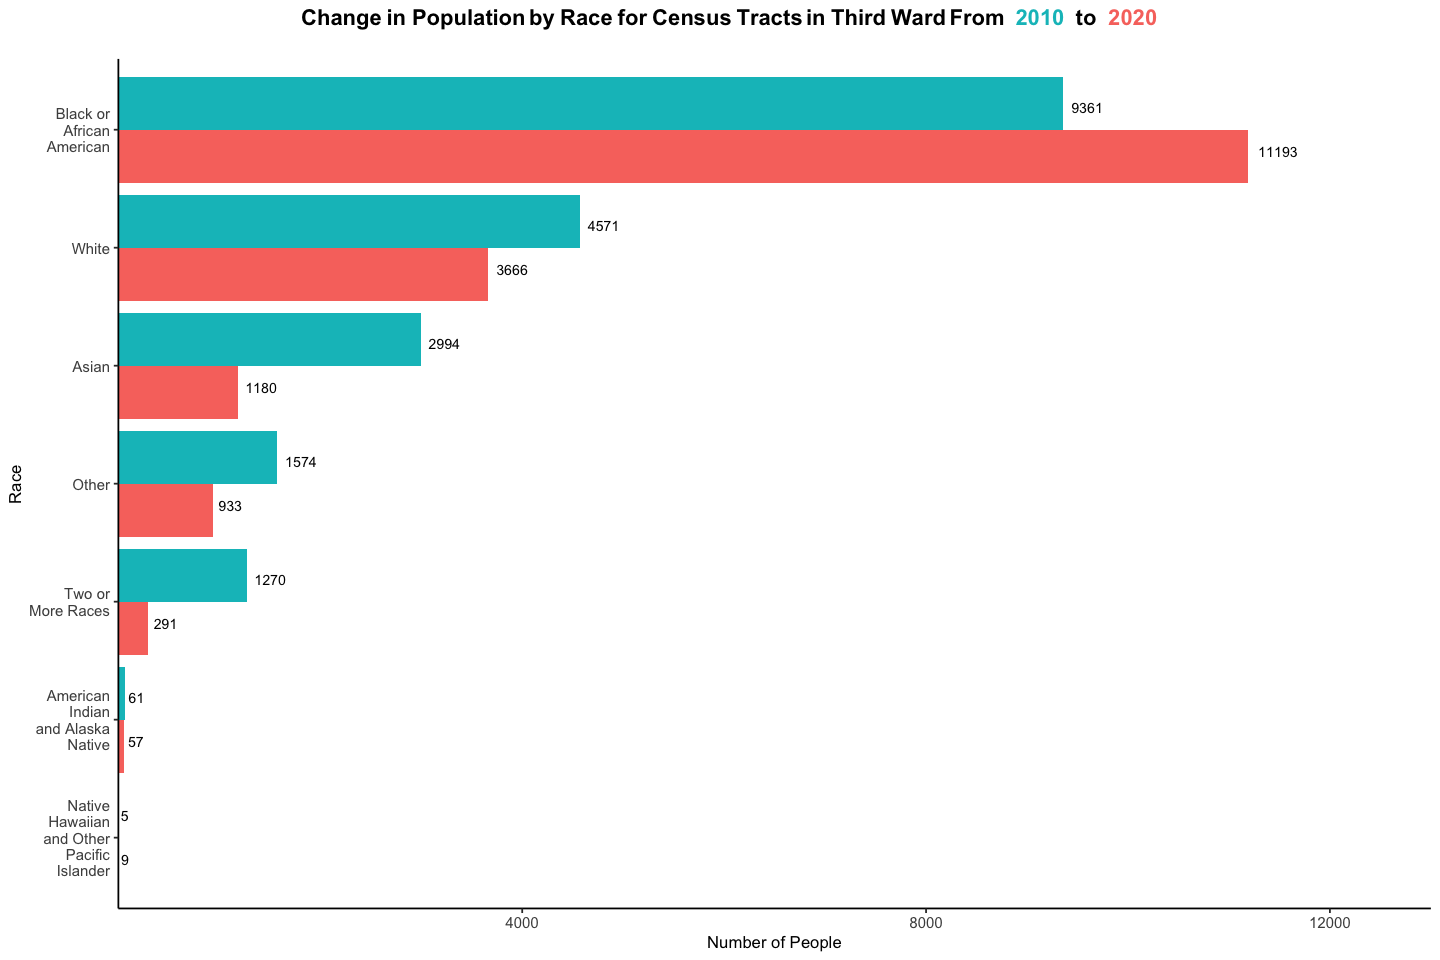

In [40]:
# Plot the graph 
library(ggplot2)
library(ggtext)
library(stringr)

ggplot(data = population_combined, 
       mapping = aes(x = reorder(Race, `Number of People`), y = `Number of People`, fill = Year)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_text(mapping = aes(label = `Number of People`), position = position_dodge(width = 0.75), hjust = -0.25, size = 3) +
  scale_y_continuous(limits = c(0, 13000),
                     breaks = c(4000, 8000, 12000),
                     expand = c(0, 0)) +
  scale_x_discrete(labels = function(Race) str_wrap(Race, width = 10)) +
  coord_flip() +
  theme_bw() +
  theme(legend.position = "none") +
  theme(panel.border = element_blank()) +
  theme(panel.grid.major = element_blank()) +
  theme(panel.grid.minor = element_blank()) +
  theme(axis.title = element_text(size = 10)) +
  theme(axis.text.y = element_text(size = 9)) +
  theme(axis.text.x = element_text(size = 9)) +
  theme(axis.line = element_line(color = "black")) +
  labs(x = "Race", y = "Number of People",
       title = "**Change in Population by Race for Census Tracts in Third Ward From** 
       <span style = 'color: #00BFC4;'>**2010**</span> 
       **to** 
       <span style = 'color: #F8766D;'>**2020**</span><br>") +
  theme(plot.title = element_markdown(hjust = 0.40))